# PV 


In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm
from tqdm import tqdm, trange

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"
]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in trange(1, 11):
    # Générer le chemin du fichier pour chaque batch
    batch_str = f"batch_{batch_id:04d}"  # Format batch_0001, batch_0002, ..., batch_0010
    path_PV = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_PV\\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.TYNDP.DE.PV.nc"
    
    # Charger les données pour le batch actuel
    data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
    
    # Liste pour stocker les données journalières des pays
    daily_sums_per_batch = []
    
    # Itérer sur les pays pour calculer la somme journalière
    for country in tqdm(countries):
        country_var = f'PV_{country}'
        if country_var in data_PV.variables:
            # Extraire la production pour le pays et convertir en GW
            data_to_plot = data_PV[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            
            # Resampler à une fréquence journalière
            data_daily = data_to_plot.resample(time='D').mean()
            
            # Ajouter aux données journalières
            daily_sums_per_batch.append(data_daily)
    
    # Calculer la somme journalière pour tous les pays dans ce batch
    total_daily_sum = sum(daily_sums_per_batch)

    
    # Extraire les jours de l'année
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    
    # Ajouter à la liste globale
    all_daily_sums.append(total_daily_sum)

# Combiner les données de tous les batchs
combined_data = xr.concat(all_daily_sums, dim='batch')


# Extraire toutes les valeurs de production et les jours de l'année
day_of_year = combined_data['day_of_year'].values.flatten()
PV_values = combined_data.values.flatten()

# Assurez-vous que les longueurs de day_of_year et wind_values sont les mêmes
min_length = min(len(day_of_year), len(PV_values))
day_of_year = day_of_year[:min_length]
PV_values = PV_values[:min_length]

# Créer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel (densité des points)
plt.hist2d(day_of_year, PV_values, bins=[365, 300], cmap='plasma')

# Ajouter une échelle de couleur
cbar = plt.colorbar()
cbar.set_label('Number of Events', fontsize=12)

# Calculer et tracer la moyenne pour chaque jour de l'année
mean_per_day = [np.nanmean(PV_values[day_of_year == day]) for day in range(1, 366)]
plt.plot(range(1, 366), mean_per_day, color='white', linewidth=2, label='Mean')

# Ajouter les détails du graphique
plt.title("European Daily PV Production Density (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

# Afficher le graphique
plt.tight_layout()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\flore\AppData\Local\Temp\ipykernel_26344\2249737775.py:23: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
  0%|          | 0/10 [00:30<?, ?it/s]


KeyboardInterrupt: 

Anomalie 
 

C:\Users\flore\AppData\Local\Temp\ipykernel_23004\3512781350.py:19: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_23004\3512781350.py:19: DeprecationWarning: Usage of 'use_cftime' as a kwarg is deprecated. Please pass a 'CFDatetimeCoder' instance initialized with 'use_cftime' to the 'decode_times' kwarg instead.
Example usage:
    time_coder = xr.coders.CFDatetimeCoder(use_cftime=True)
    ds = xr.open_dataset(decode_times=time_coder)

  data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
C:\Users\flore\AppData\Local\Temp\ipykernel_23004\3512781350.py:19: DeprecationWarning: Usage of 'use_cftime' as a

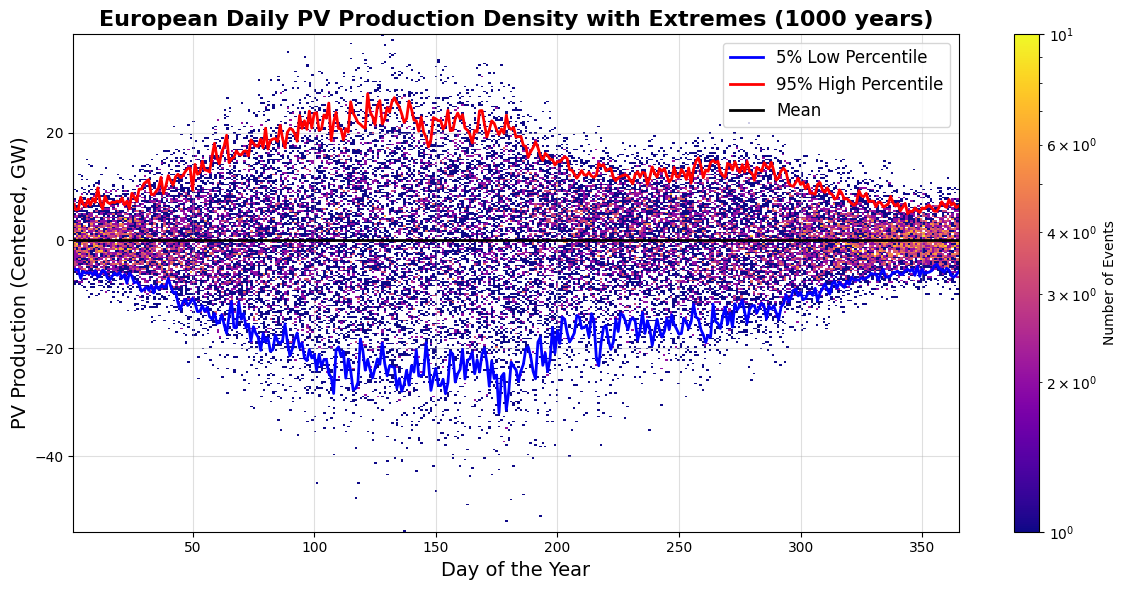

In [2]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from matplotlib.colors import LogNorm

# Liste des pays européens
countries = [
    "AT", "BE", "DK", "FR", "DE", "IE", "IT",
    "NL", "NO", "PT", "ES", "SE", "CH", "UK"]

# Liste pour collecter toutes les sommes journalières
all_daily_sums = []

# Itérer sur les 10 batchs
for batch_id in range(1, 11):
    batch_str = f"batch_{batch_id:04d}"
    path_PV = f"C:\\Users\\flore\\OneDrive\\Documents\\annee3bx\\theselol\\analyse\\data\\prod_PV\\CAM4_F2000_p144_ctrl_PV_9scenarios_timeseries\\CAM4_F2000_p144_ctrl_{batch_str}.TYNDP.DE.PV.nc"
    
    data_PV = xr.open_dataset(path_PV, use_cftime=True, decode_times=True)
    
    daily_sums_per_batch = []
    for country in countries:
        country_var = f'PV_{country}'
        if country_var in data_PV.variables:
            data_to_plot = data_PV[country_var].isel(lat=0, lon=0) / 1e9  # Conversion en GW
            data_daily = data_to_plot.resample(time='D').mean()
            daily_sums_per_batch.append(data_daily)
    
    total_daily_sum = sum(daily_sums_per_batch)
    total_daily_sum['day_of_year'] = total_daily_sum['time'].dt.dayofyear
    all_daily_sums.append(total_daily_sum)

combined_data = xr.concat(all_daily_sums, dim='batch')
day_of_year = combined_data['day_of_year'].values.flatten()
PV_values = combined_data.values.flatten()

min_length = min(len(day_of_year), len(PV_values))
day_of_year = day_of_year[:min_length]
PV_values = PV_values[:min_length]

# Calculer la moyenne journalière
mean_per_day = [np.nanmean(PV_values[day_of_year == day]) for day in range(1, 366)]
mean_per_day = np.array(mean_per_day)

# Centrer les données autour de 0
PV_values_centered = PV_values - np.tile(mean_per_day, len(PV_values) // 365 + 1)[:len(PV_values)]

# Calculer les percentiles pour chaque jour
low_percentiles = []
high_percentiles = []
for day in range(1, 366):
    values_for_day = PV_values_centered[day_of_year == day]
    low_percentiles.append(np.nanpercentile(values_for_day, 5))  # 5% inférieur
    high_percentiles.append(np.nanpercentile(values_for_day, 95))  # 5% supérieur

# Tracer le graphique
plt.figure(figsize=(12, 6))

# Histogramme bidimensionnel
hist = plt.hist2d(day_of_year, PV_values_centered, bins=[365, 300], cmap='plasma', norm=LogNorm())
plt.colorbar(hist[3], label='Number of Events')

# Tracer les courbes des percentiles
plt.plot(range(1, 366), low_percentiles, color='blue', linewidth=2, label='5% Low Percentile')
plt.plot(range(1, 366), high_percentiles, color='red', linewidth=2, label='95% High Percentile')
plt.plot(range(1, 366), np.zeros(365), color='black', linewidth=2, label='Mean')

# Ajouter les détails du graphique
plt.title("European Daily PV Production Density with Extremes (1000 years)", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Year", fontsize=14)
plt.ylabel("PV Production (Centered, GW)", fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.4)

plt.tight_layout()
plt.show()



# Wind 